# Data Preparation

In [7]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate();

In [9]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

In [10]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [11]:
import pandas as pd
import numpy as np

In [12]:
ins = spark.read.csv("/content/drive/MyDrive/Sample_Data/insurance.csv", header=True)

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Sample_Data/insurance.csv')

In [14]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


femail = 0 , male = 1

In [16]:
df['sex'] = np.where(df['sex'] == "female", 0, 1)

In [17]:
df['smoker'] = np.where(df['smoker'] == 'no', 0, 1)

In [18]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


In [19]:
df.loc[df['region'] == 'southwest', 'region'] = 0
df.loc[df['region'] == 'southeast', 'region'] = 1
df.loc[df['region'] == 'northwest', 'region'] = 2
df.loc[df['region'] == 'northeast', 'region'] = 3
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


In [20]:
df['label'] = df['expenses']

In [21]:
from pyspark.ml.regression import LinearRegression

In [22]:
insDF = spark.createDataFrame(df)
insDF.show()

+---+---+----+--------+------+------+--------+--------+
|age|sex| bmi|children|smoker|region|expenses|   label|
+---+---+----+--------+------+------+--------+--------+
| 19|  0|27.9|       0|     1|     0|16884.92|16884.92|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|
| 28|  1|33.0|       3|     0|     1| 4449.46| 4449.46|
| 33|  1|22.7|       0|     0|     2|21984.47|21984.47|
| 32|  1|28.9|       0|     0|     2| 3866.86| 3866.86|
| 31|  0|25.7|       0|     0|     1| 3756.62| 3756.62|
| 46|  0|33.4|       1|     0|     1| 8240.59| 8240.59|
| 37|  0|27.7|       3|     0|     2| 7281.51| 7281.51|
| 37|  1|29.8|       2|     0|     3| 6406.41| 6406.41|
| 60|  0|25.8|       0|     0|     2|28923.14|28923.14|
| 25|  1|26.2|       0|     0|     3| 2721.32| 2721.32|
| 62|  0|26.3|       0|     1|     1|27808.73|27808.73|
| 23|  1|34.4|       0|     0|     0| 1826.84| 1826.84|
| 56|  0|39.8|       0|     0|     1|11090.72|11090.72|
| 27|  1|42.1|       0|     1|     1|39611.76|39

In [23]:
vectorAssembler = VectorAssembler(inputCols=['age','sex','bmi','children','smoker','region'], outputCol='features')

In [24]:
vinsDF = vectorAssembler.transform(insDF)
vinsDF.show()

+---+---+----+--------+------+------+--------+--------+--------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|            features|
+---+---+----+--------+------+------+--------+--------+--------------------+
| 19|  0|27.9|       0|     1|     0|16884.92|16884.92|[19.0,0.0,27.9,0....|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|[18.0,1.0,33.8,1....|
| 28|  1|33.0|       3|     0|     1| 4449.46| 4449.46|[28.0,1.0,33.0,3....|
| 33|  1|22.7|       0|     0|     2|21984.47|21984.47|[33.0,1.0,22.7,0....|
| 32|  1|28.9|       0|     0|     2| 3866.86| 3866.86|[32.0,1.0,28.9,0....|
| 31|  0|25.7|       0|     0|     1| 3756.62| 3756.62|[31.0,0.0,25.7,0....|
| 46|  0|33.4|       1|     0|     1| 8240.59| 8240.59|[46.0,0.0,33.4,1....|
| 37|  0|27.7|       3|     0|     2| 7281.51| 7281.51|[37.0,0.0,27.7,3....|
| 37|  1|29.8|       2|     0|     3| 6406.41| 6406.41|[37.0,1.0,29.8,2....|
| 60|  0|25.8|       0|     0|     2|28923.14|28923.14|[60.0,0.0,25.8,0....|

In [25]:
#indexer = StringIndexer(inputCol='expenses', outputCol='label')
#ivinsDF = indexer.fit(vinsDF).transform(vinsDF)
#ivinsDF.show()

In [26]:
splits = vinsDF.randomSplit([0.7,0.3],1)
trainDF = splits[0]
testDF = splits[1]

In [27]:
trainDF.show()

+---+---+----+--------+------+------+--------+--------+--------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|            features|
+---+---+----+--------+------+------+--------+--------+--------------------+
| 18|  0|20.8|       0|     0|     1| 1607.51| 1607.51|[18.0,0.0,20.8,0....|
| 18|  0|24.1|       1|     0|     1|  2201.1|  2201.1|[18.0,0.0,24.1,1....|
| 18|  0|25.1|       0|     0|     3| 2196.47| 2196.47|[18.0,0.0,25.1,0....|
| 18|  0|26.3|       0|     0|     3| 2198.19| 2198.19|[18.0,0.0,26.3,0....|
| 18|  0|30.1|       0|     0|     3| 2203.47| 2203.47|[18.0,0.0,30.1,0....|
| 18|  0|30.1|       0|     0|     3|21344.85|21344.85|[18.0,0.0,30.1,0....|
| 18|  0|31.4|       0|     0|     1| 1622.19| 1622.19|[18.0,0.0,31.4,0....|
| 18|  0|32.1|       2|     0|     1| 2801.26| 2801.26|[18.0,0.0,32.1,2....|
| 18|  0|33.2|       0|     0|     3|  2207.7|  2207.7|[18.0,0.0,33.2,0....|
| 18|  0|33.9|       0|     0|     1|11482.63|11482.63|[18.0,0.0,33.9,0....|

In [28]:
testDF.show()

+---+---+----+--------+------+------+--------+--------+--------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|            features|
+---+---+----+--------+------+------+--------+--------+--------------------+
| 18|  0|26.7|       0|     0|     1| 1615.77| 1615.77|[18.0,0.0,26.7,0....|
| 18|  0|29.2|       0|     0|     3| 7323.73| 7323.73|[18.0,0.0,29.2,0....|
| 18|  0|36.9|       0|     1|     1|36149.48|36149.48|[18.0,0.0,36.9,0....|
| 18|  0|37.3|       1|     0|     1| 2219.45| 2219.45|[18.0,0.0,37.3,1....|
| 18|  0|38.2|       0|     0|     1| 1631.67| 1631.67|[18.0,0.0,38.2,0....|
| 18|  0|38.3|       0|     0|     1| 1631.82| 1631.82|[18.0,0.0,38.3,0....|
| 18|  0|38.3|       0|     0|     1|14133.04|14133.04|[18.0,0.0,38.3,0....|
| 18|  1|31.7|       2|     1|     1|34303.17|34303.17|[18.0,1.0,31.7,2....|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|[18.0,1.0,33.8,1....|
| 18|  1|34.1|       0|     0|     1| 1137.01| 1137.01|[18.0,1.0,34.1,0....|

In [29]:
testDF.select('features').where('expenses == 1737.38').take(1)

[Row(features=SparseVector(6, {0: 19.0, 2: 24.7}))]

In [30]:
testDF.select('features').where('expenses == 2331.52').take(1)

[Row(features=DenseVector([19.0, 0.0, 28.4, 1.0, 0.0, 0.0]))]

In [31]:
vinsDF.count()

1338

# Linear Regression

In [32]:
lr = LinearRegression(featuresCol='features', labelCol='label')

In [33]:
lrModel = lr.fit(trainDF)

In [34]:
lrPrediction = lrModel.transform(testDF)
lrPrediction.show()

+---+---+----+--------+------+------+--------+--------+--------------------+------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|            features|        prediction|
+---+---+----+--------+------+------+--------+--------+--------------------+------------------+
| 18|  0|26.7|       0|     0|     1| 1615.77| 1615.77|[18.0,0.0,26.7,0....|1137.7463927609588|
| 18|  0|29.2|       0|     0|     3| 7323.73| 7323.73|[18.0,0.0,29.2,0....|2578.5144869213545|
| 18|  0|36.9|       0|     1|     1|36149.48|36149.48|[18.0,0.0,36.9,0....| 28953.00075976341|
| 18|  0|37.3|       1|     0|     1| 2219.45| 2219.45|[18.0,0.0,37.3,1....| 4871.203972335175|
| 18|  0|38.2|       0|     0|     1| 1631.67| 1631.67|[18.0,0.0,38.2,0....| 4694.790579813531|
| 18|  0|38.3|       0|     0|     1| 1631.82| 1631.82|[18.0,0.0,38.3,0....| 4725.721398831376|
| 18|  0|38.3|       0|     0|     1|14133.04|14133.04|[18.0,0.0,38.3,0....| 4725.721398831376|
| 18|  1|31.7|       2|     1|     1|343

In [35]:
evaluator = MulticlassClassificationEvaluator()

In [36]:
evaluator.setPredictionCol("prediction")

MulticlassClassificationEvaluator_8ad047c355fe

In [37]:
dfAccuracy = evaluator.evaluate(lrPrediction)

In [38]:
dfAccuracy

0.0

In [39]:
from pyspark.ml.feature import ChiSqSelector

In [40]:
selector=ChiSqSelector(percentile=0.9, featuresCol="features", outputCol='selectedFeatures', labelCol= "label")
model=selector.fit(trainDF)
result = model.transform(trainDF)
trainDF =result.select('label','selectedFeatures').withColumnRenamed('selectedFeatures', 'features')
new_test=model.transform(testDF)
testDF=new_test.select('label','selectedFeatures').withColumnRenamed('selectedFeatures', 'features')

In [41]:
df.sort_values(by=['expenses'])

,age,sex,bmi,children,smoker,region,expenses,label
940,18,1,23.2,0,0,1,1121.87,1121.87
808,18,1,30.1,0,0,1,1131.51,1131.51
1244,18,1,33.3,0,0,1,1135.94,1135.94
663,18,1,33.7,0,0,1,1136.40,1136.40
22,18,1,34.1,0,0,1,1137.01,1137.01
...,...,...,...,...,...,...,...,...
819,33,0,35.5,0,1,2,55135.40,55135.40
577,31,0,38.1,1,1,3,58571.07,58571.07
1230,52,1,34.5,3,1,2,60021.40,60021.40
1300,45,1,30.4,0,1,1,62592.87,62592.87


In [42]:
lrModel.coefficients

DenseVector([258.0449, 120.5921, 309.3082, 454.7908, 24660.3108, 333.7488])

In [43]:
lrModel.summary.rootMeanSquaredError

6145.8879698994215

# Decision Tree

In [44]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

In [45]:
dt = DecisionTreeRegressor(featuresCol='features', labelCol='label')

In [46]:
dtModel = dt.fit(trainDF)

In [47]:
dtPredictions = dtModel.transform(testDF)

In [48]:
dtPredictions.show()

+--------+--------------------+------------------+
|   label|            features|        prediction|
+--------+--------------------+------------------+
| 1615.77|[18.0,0.0,26.7,0....| 2707.841743119266|
| 7323.73|[18.0,0.0,29.2,0....| 2707.841743119266|
|36149.48|[18.0,0.0,36.9,0....| 37440.13333333334|
| 2219.45|[18.0,0.0,37.3,1....| 2707.841743119266|
| 1631.67|[18.0,0.0,38.2,0....| 2707.841743119266|
| 1631.82|[18.0,0.0,38.3,0....| 2707.841743119266|
|14133.04|[18.0,0.0,38.3,0....| 2707.841743119266|
|34303.17|[18.0,1.0,31.7,2....| 34906.42590909091|
| 1725.55|[18.0,1.0,33.8,1....| 2707.841743119266|
| 1137.01|[18.0,1.0,34.1,0....| 2707.841743119266|
|  1149.4|[18.0,1.0,43.0,0....| 2707.841743119266|
| 1737.38|(6,[0,2],[19.0,24...| 2707.841743119266|
|17468.98|[19.0,0.0,28.3,0....|16464.787999999997|
| 2331.52|[19.0,0.0,28.4,1....| 2707.841743119266|
|  4687.8|[19.0,0.0,28.6,5....| 5028.691388888889|
| 1748.77|(6,[0,2],[19.0,32...| 2707.841743119266|
| 2138.07|[19.0,0.0,37.4,0....|

In [49]:
dtEvaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')

In [50]:
rmse = dtEvaluator.evaluate(dtPredictions)
rmse

4292.110985837484

# Random Rain Forrest

In [51]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

In [52]:
rf = RandomForestRegressor(featuresCol='features', labelCol='label')

In [53]:
rfModel = rf.fit(trainDF)

In [54]:
rfPrediction = rfModel.transform(testDF)

In [55]:
rfpdf = rfPrediction.toPandas()

In [56]:
rfpdf['prediction']

0       5811.866417
1       5982.690168
2      33125.393130
3       5380.486213
4       5528.468190
           ...     
382    24745.382264
383    13623.018562
384    13137.407597
385    16620.824421
386    13770.160760
Name: prediction, Length: 387, dtype: float64

In [57]:
rfPrediction.show()

+--------+--------------------+------------------+
|   label|            features|        prediction|
+--------+--------------------+------------------+
| 1615.77|[18.0,0.0,26.7,0....| 5811.866417100149|
| 7323.73|[18.0,0.0,29.2,0....| 5982.690168161431|
|36149.48|[18.0,0.0,36.9,0....|33125.393129573706|
| 2219.45|[18.0,0.0,37.3,1....| 5380.486213325072|
| 1631.67|[18.0,0.0,38.2,0....|5528.4681903759865|
| 1631.82|[18.0,0.0,38.3,0....|5528.4681903759865|
|14133.04|[18.0,0.0,38.3,0....|5528.4681903759865|
|34303.17|[18.0,1.0,31.7,2....|30885.248552514135|
| 1725.55|[18.0,1.0,33.8,1....|5273.1865520981755|
| 1137.01|[18.0,1.0,34.1,0....| 4739.098944469025|
|  1149.4|[18.0,1.0,43.0,0....| 4449.321976875681|
| 1737.38|(6,[0,2],[19.0,24...|  5197.87191834599|
|17468.98|[19.0,0.0,28.3,0....| 18990.70761418436|
| 2331.52|[19.0,0.0,28.4,1....| 5452.172070377603|
|  4687.8|[19.0,0.0,28.6,5....| 7249.756171436701|
| 1748.77|(6,[0,2],[19.0,32...| 5966.991613408451|
| 2138.07|[19.0,0.0,37.4,0....|

Text(0, 0.5, 'Prediction')

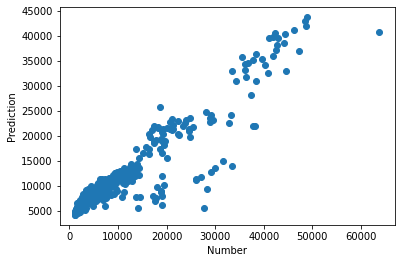

In [58]:
import matplotlib.pyplot as plt
plt.scatter(rfpdf['label'], rfpdf['prediction'])
plt.xlabel('Number')
plt.ylabel('Prediction')

In [59]:
dtEvaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')

In [60]:
rmse = dtEvaluator.evaluate(rfPrediction)

In [61]:
rmse

4773.8529744357